In [38]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [39]:
from fastai.vision import *

In [40]:
cd ~/tutorials/data/wildlife-classification2

/home/jupyter/tutorials/data/wildlife-classification2


In [41]:
path = Path('/home/jupyter/tutorials/data/wildlife-classification2')

In [42]:
X_2_xxx = pd.read_csv(path/"X_2_xxx.csv")
X_2_xxx['animal'].value_counts()

blank     796
animal    560
Name: animal, dtype: int64

In [43]:
tfms = get_transforms(max_zoom=1., max_warp=0.)

In [44]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path,  csv_labels='X_2_xxx.csv',  valid_pct=0.2, ds_tfms=tfms, size=256, bs=64, num_workers=4).normalize(imagenet_stats)

In [45]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['animal', 'blank'], 2, 1085, 271)

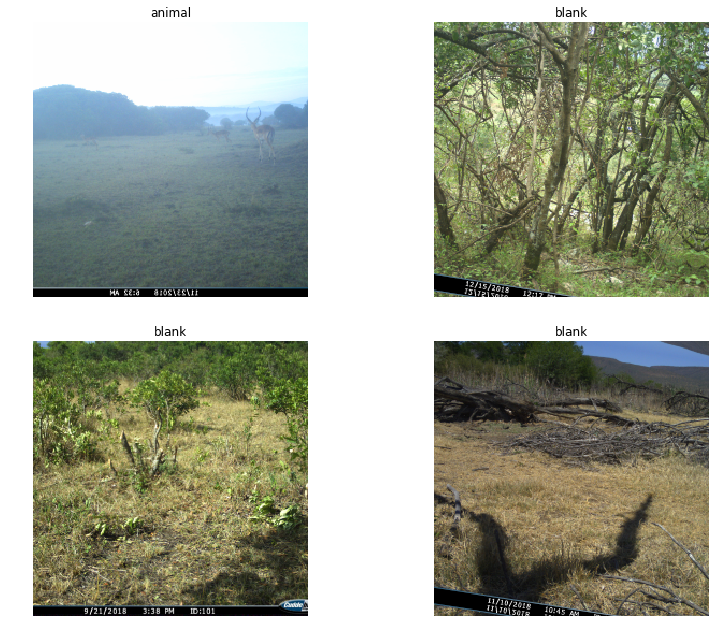

In [46]:
data.show_batch(rows=2, figsize=(12,9))

In [47]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [48]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.772213,0.401753,0.129151,01:49
1,0.590839,0.504673,0.143911,01:34
2,0.482340,0.348500,0.118081,01:33
3,0.399392,0.336794,0.118081,01:33


In [49]:
learn.save('X_2_xxx-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


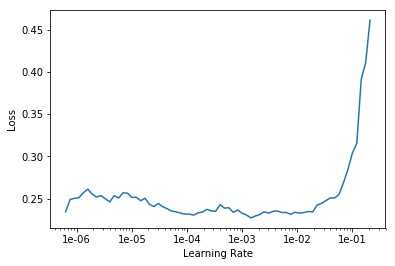

In [50]:
learn.lr_find()
learn.recorder.plot()

In [52]:
learn.load('X_2_xxx-1')

Learner(data=ImageDataBunch;

Train: LabelList (1085 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
blank,animal,blank,blank,blank
Path: /home/jupyter/tutorials/data/wildlife-classification2;

Valid: LabelList (271 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
blank,blank,blank,blank,animal
Path: /home/jupyter/tutorials/data/wildlife-classification2;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        

In [53]:
learn.unfreeze()
learn.fit_one_cycle(6, max_lr=slice(1e-4,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.429840,2.825518,0.254613,01:33
1,0.353928,0.472853,0.125461,01:34
2,0.280878,0.263374,0.099631,01:34


In [56]:
learn.save('X_2_xxx-2')

## Interpretation

In [58]:
learn.load('X_2_xxx-2')

Learner(data=ImageDataBunch;

Train: LabelList (1085 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
blank,animal,blank,blank,blank
Path: /home/jupyter/tutorials/data/wildlife-classification2;

Valid: LabelList (271 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
blank,blank,blank,blank,animal
Path: /home/jupyter/tutorials/data/wildlife-classification2;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        

In [59]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

In [60]:
interp.most_confused(min_val=2)

[('animal', 'blank', 15), ('blank', 'animal', 8)]

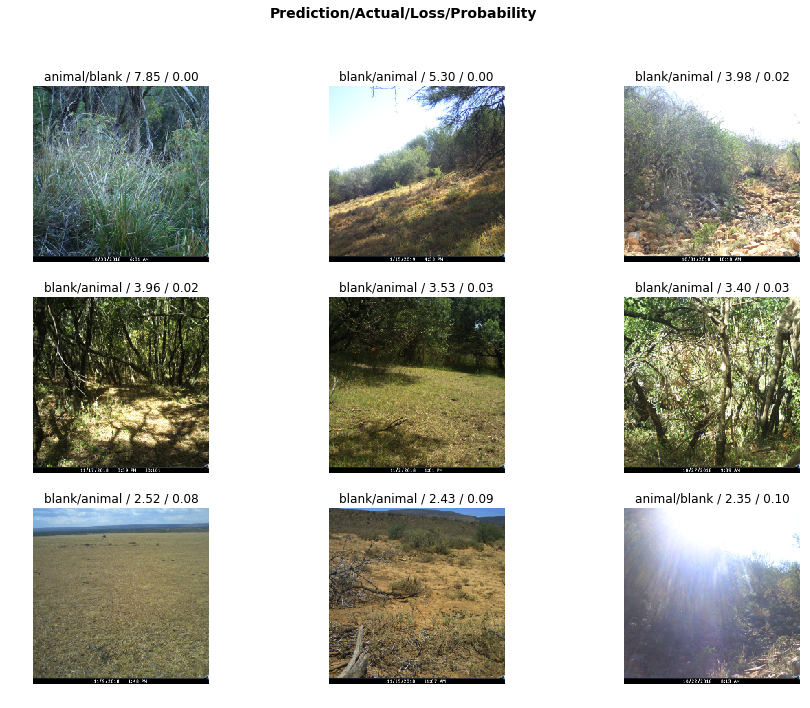

In [61]:
interp.plot_top_losses(9, figsize=(15,11))

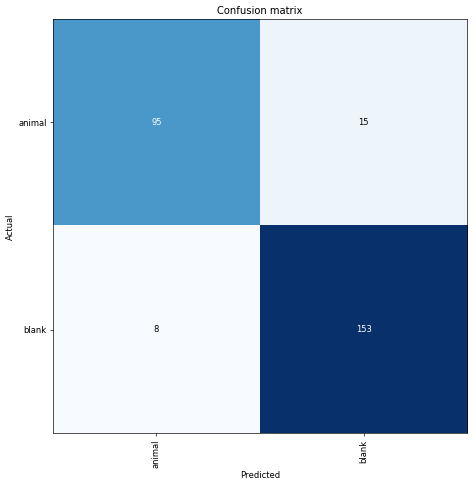

In [63]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

 ## Cleaning up

In [ ]:
from fastai.widgets import *